In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

/Users/mdurbin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df_s = pd.read_csv('final_data_files/sollima_2006.cat', delim_whitespace=True, index_col=False)
df_p = pd.read_csv('final_data_files/rey_2000.cat', delim_whitespace=True, index_col=False)

In [3]:
df = pd.merge(df_s, df_p, on=['id','type'])

In [4]:
dfab = df[df.type == 0]
dfc = df[df.type == 1]

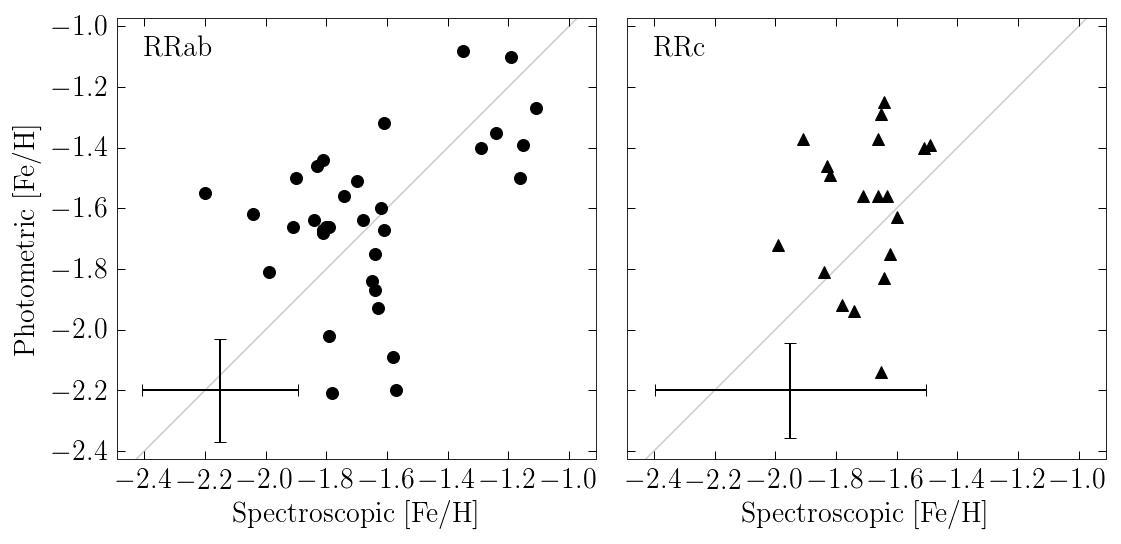

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,4))
ax1.plot([-5,5],[-5,5],'#CCCCCC',lw=0.75,zorder=-1)
ax2.plot([-5,5],[-5,5],'#CCCCCC',lw=0.75,zorder=-1)
ppl.plot(ax1,dfab['spectfeh'],dfab['photfeh'],'ko')
ppl.plot(ax2,dfc['spectfeh'],dfc['photfeh'],'k^')
ax1.errorbar(-2.15,-2.2,yerr=dfab['photfeh_err'].mean(),xerr=dfab['spectfeh_err'].mean(),fmt=',',color='k')
ax2.errorbar(-1.95,-2.2,yerr=dfc['photfeh_err'].mean(),xerr=dfc['spectfeh_err'].mean(),fmt=',',color='k')
ax1.text(-2.4,-1.1,'RRab')
ax2.text(-2.4,-1.1,'RRc')
ax1.set_ylabel('Photometric [Fe/H]')
ax1.set_xlabel('Spectroscopic [Fe/H]')
ax2.set_xlabel('Spectroscopic [Fe/H]')
ax1.set_aspect('equal')
ax1.set_ylim((-2.36,-1.04))
ax1.set_xlim(ax1.get_ylim())
#print ax2.get_ylim(), ax2.get_xlim()
fig.tight_layout()
fig.savefig('final_plots/metallicity_vs_metallicity.pdf')

#print dfab['photfeh_err'].mean(), dfab['spectfeh_err'].mean()